<a href="https://colab.research.google.com/github/Bunnykey/PFDS/blob/master/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# data load

from sklearn.datasets import fetch_california_housing

X,y = fetch_california_housing(return_X_y = True)
X, y

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [7]:
house = fetch_california_housing()
house.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

In [8]:
data = pd.DataFrame(house.data, columns = house.feature_names)
target = pd.DataFrame(house.target)

data, target

(       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
 0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
 1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
 2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
 3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
 4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
 ...       ...       ...       ...  ...       ...       ...        ...
 20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
 20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
 20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
 20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
 20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24
 
 [20640 rows x 8 columns],            0
 0      4.526
 1      3.585
 2      3.521
 3      3.413
 4      3.422
 ...      ...
 20635  0.781
 20636  

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(data[['HouseAge']], target, test_size = 0.3, random_state = 42)

linear_estimator = LinearRegression()

In [10]:
data['HouseAge'].max(), data['HouseAge'].min()

(52.0, 1.0)

In [11]:
mybins = np.linspace(0, 50, 10)

which_bin = np.digitize(X_train, bins = mybins)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

encoder.fit(which_bin)

X_bin = encoder.transform(which_bin)

print(X_bin[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


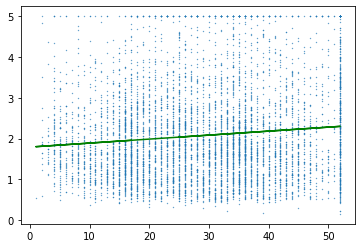

In [12]:
reg_lr = LinearRegression().fit(X_train, y_train)
reg_lr_bin = LinearRegression().fit(X_bin, y_train)

plt.scatter(X_test, y_test, s=0.1)
plt.plot(X_test, reg_lr.predict(X_test), color = "green")
plt.show()

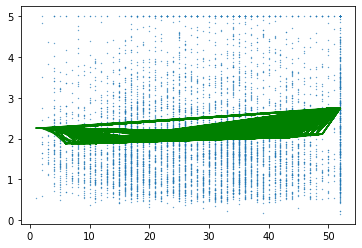

In [13]:
new_bin = np.digitize(X_test, bins = mybins)
encoder.fit(new_bin)
X_test_bin = encoder.transform(new_bin)

plt.scatter(X_test, y_test, s=0.1)
plt.plot(X_test, reg_lr_bin.predict(X_test_bin), color = "green")
plt.show()

In [ ]:
X,y = fetch_california_housing(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

# polynomial is deprecated because of too much features on X

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler()
scaler.fit(X_train)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

from sklearn.feature_selection import SelectKBest

from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
encoded_train = lab_enc.fit_transform(y_train)
encoded_test = lab_enc.fit_transform(y_test)

y_train.max(), y_train.min()

(5.00001, 0.14999)

In [31]:
clf.fit(X_train_scaled, encoded)

from sklearn.metrics import accuracy_score
y_train_hat = clf.predict(X_train_scaled)
print('train accuracy : ', accuracy_score(encoded_train, y_train_hat))
y_test_hat = clf.predict(X_test_scaled)
print('test accuracy : ', accuracy_score(encoded_test, y_test_hat))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train accuracy :  0.05119509043927649
test accuracy :  0.0
